In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_file = "./troop_movements.csv"
raw = pd.read_csv(input_file)

In [9]:
raw.head(5)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:32:09,1,at-st,empire,6,4,2,2,Stewjon
1,2024-02-06 16:32:08,2,resistance_soldier,empire,9,4,9,9,Rodia
2,2024-02-06 16:32:07,3,tie_fighter,resistance,1,6,2,5,Troiken
3,2024-02-06 16:32:06,4,tie_silencer,empire,2,9,3,8,Dathomir
4,2024-02-06 16:32:05,5,at-st,empire,4,3,8,7,Mirial


In [4]:
data = raw.copy()

In [31]:
empire_or_resistance = data[["empire_or_resistance"]].groupby(["empire_or_resistance"]).size().reset_index(name = "Count").head(2)

In [15]:
data[["homeworld"]].groupby(["homeworld"]).size().reset_index(name = "Count").head(4)

,homeworld,Count
0,Alderaan,16
1,Aleen Minor,24
2,Bestine IV,26
3,Cerea,22


In [16]:
data[["unit_type"]].groupby(["unit_type"]).size().reset_index(name = "Count").tail(2)

,unit_type,Count
6,unknown,122
7,x-wing,121


In [23]:
data["empire_or_resistance"] == "resistance"

0      False
1      False
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999    False
Name: empire_or_resistance, Length: 1000, dtype: bool

In [21]:
data["is_resistance"] = data["empire_or_resistance"] == "resistance"

In [25]:
data.head(2)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-06 16:32:09,1,at-st,empire,6,4,2,2,Stewjon,False
1,2024-02-06 16:32:08,2,resistance_soldier,empire,9,4,9,9,Rodia,False


In [27]:
sns.set()

In [35]:
empire_or_resistance

,empire_or_resistance,Count
0,empire,488
1,resistance,512


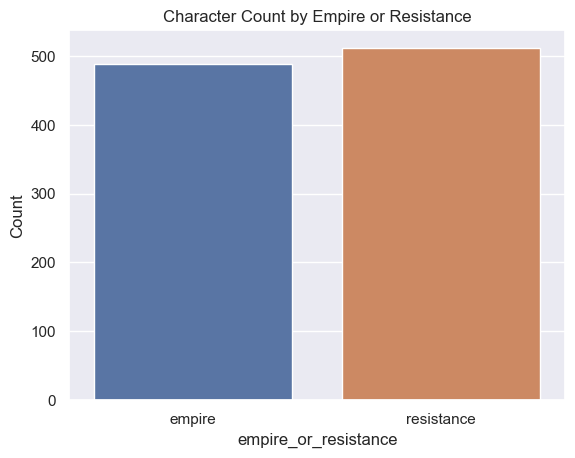

In [44]:
sns.barplot(empire_or_resistance, y = "Count", x = "empire_or_resistance").set(title = "Character Count by Empire or Resistance");

In [51]:
data_for_model = data[["homeworld", "unit_type"]].copy()
data_for_model.head()

,homeworld,unit_type
0,Stewjon,at-st
1,Rodia,resistance_soldier
2,Troiken,tie_fighter
3,Dathomir,tie_silencer
4,Mirial,at-st


In [48]:
from sklearn.model_selection import train_test_split

In [62]:
data_for_model = data_for_model.astype("category")

In [63]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   homeworld  1000 non-null   category
 1   unit_type  1000 non-null   category
dtypes: category(2)
memory usage: 3.8 KB


In [109]:
data_for_model = pd.get_dummies(data_for_model)

In [110]:
is_resistance = data["is_resistance"].copy()

In [113]:
data_train, data_test, label_train, label_test = train_test_split(data_for_model, is_resistance, test_size=0.3, random_state=1)
from sklearn.tree  import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(data_train, label_train) 
label_predict = model.predict(data_test)
model.score(data_train, label_train)

0.7942857142857143

In [ ]:
import sklearn.metrics as metrics
metrics.confusion_matrix(label_test, label_predict)

In [115]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': data_for_model.columns, 'Importance': importances})

In [150]:
feature_importances.sort_values(by = "Importance", inplace = True, ascending = False)

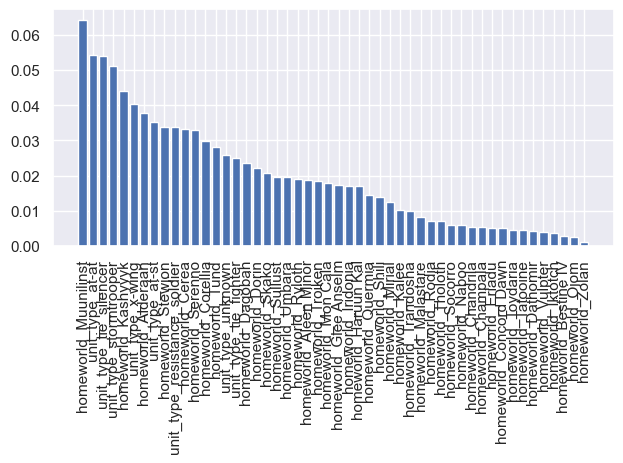

In [154]:
plt.bar(feature_importances["Feature"], height = feature_importances["Importance"])
plt.xticks(rotation=90)
plt.tight_layout()

In [156]:
import pickle
pickle.dump(model, open('trained_model.pkl','wb'))